In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.pyplot import MultipleLocator
from scipy.stats import linregress
import numpy as np

import sys
sys.path.append('../script')
import common_function as CF

In [2]:
#path for alternative splicing type length and TM-score
tm_score_length_path='../data/csv/tm_score_length.csv'

#path for match sequence identity and TM-score
tm_score_path='../data/json/tm_score.json'
as_event_path='../data/json/as_event.json'
sequence_identity_path='../data/json/sequence_identity.json'
reference_summary_path='../data/csv/summary_reference.csv'
isoform_summary_path='../data/csv/summary_isoform.csv'

In [3]:
def load_file_json(path):
    with open(path,'r') as load_f:
        file=json.load(load_f)
    return file

<span style="font-size: 20px;">Plot alternative splicing type length and TM-score: </span>

In [4]:
tm_score_length = pd.read_csv(tm_score_length_path)

In [5]:
reference_summary = pd.read_csv(reference_summary_path)
isoform_summary = pd.read_csv(isoform_summary_path)

In [6]:
reference_high = reference_summary[reference_summary['plddt']>=90.0].reset_index(drop=True)

In [7]:
isoform_high = isoform_summary[isoform_summary['plddt']>=90.0].reset_index(drop=True)

In [40]:
isoform_high_list = isoform_high['isoform'].tolist()
#isoform_high_list=[]
#for isoform in isoform_high['isoform']:
    #reference=isoform.split('-')[0]
    #if reference in list(reference_high['reference']):
        #isoform_high_list.append(isoform)

In [35]:
#len(isoform_high_list)

863

In [41]:
tm_score_length_high = tm_score_length[tm_score_length['isoform'].isin(isoform_high_list)].reset_index(drop=True)

In [42]:
tm_score_length_high

,isoform,plddt_difference,exon_skipping,alternative_donor_site,alternative_acceptor_site,mutually_exclusive_exon,intron_retention,alternative_first_exon,alternative_last_exon,mutually_exclusive_exon-alternative_first_exon,mutually_exclusive_exon-alternative_last_exon,tm_align
0,Q9H9T3-5,2.225150,0.000000,0.0,0.0,0.0,0.0,92.0,0.000000,0.000000,0.0,0.914495
1,Q96PC3-4,1.826494,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.982452
2,Q6PII5-2,17.052963,0.000000,0.0,0.0,0.0,0.0,0.0,8.000000,0.000000,0.0,0.785577
3,Q16555-2,1.016362,0.000000,0.0,0.0,0.0,0.0,36.0,0.000000,0.000000,0.0,0.904625
4,Q8NES3-2,9.448460,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,129.000000,0.0,0.792084
...,...,...,...,...,...,...,...,...,...,...,...,...
872,P00338-5,1.201117,41.000000,0.0,0.0,0.0,0.0,0.0,49.666667,0.000000,0.0,0.849920
873,P16118-2,2.396112,41.666667,0.0,0.0,0.0,0.0,0.0,0.000000,9.666667,0.0,0.923170
874,P38571-2,1.188182,39.000000,0.0,0.0,0.0,0.0,0.0,0.000000,56.666667,0.0,0.857097
875,P53677-2,2.064796,69.000000,0.0,0.0,0.0,0.0,0.0,75.333333,0.000000,0.0,0.792637


In [34]:
#plot the length caused by each alternaitve splicing event and the TM-score
def plot_length_tm(tm_align_length_df,name=None):
    tm_list=[]
    length_list=[]
    tm_align_length_df=tm_align_length_df.rename(columns={'exon_skipping':'Exon skipping',
                 'alternative_donor_site':'Alternative donor site',
                 'alternative_acceptor_site':'Alternative acceptor site',
                 'mutually_exclusive_exon':'Mutually exclusive exon',
                 'intron_retention':'Intron retention',
                 'alternative_first_exon':'Alternative first exon',
                 'alternative_last_exon':'Alternative last exon',
                 'mutually_exclusive_exon-alternative_first_exon':'Mutually exclusive exon Alternative first exon',
                 'mutually_exclusive_exon-alternative_last_exon':'Mutually exclusive exon Alternative last exon'})
    x_col=['Exon skipping','Alternative donor site', 'Alternative acceptor site',
           'Mutually exclusive exon', 'Intron retention', 'Alternative first exon','Alternative last exon',
           'Mutually exclusive exon Alternative first exon','Mutually exclusive exon Alternative last exon']
    fig, ax = plt.subplots(figsize=(12,8))
    color_order=['#000066','#B266FF','#009900','#CC6600','#3399FF','#FF66B2','#FF0000','#99FF33','#330000']
    for i, col in enumerate(x_col):
        mask = tm_align_length_df[col] > 0
        corr=tm_align_length_df[mask][col].corr(tm_align_length_df[mask]['tm_align'],method='pearson')
        print(col)
        print(corr)
        ax.scatter(tm_align_length_df[mask][col], tm_align_length_df[mask]['tm_align'],label=col,alpha=0.2,s=4,c=color_order[i])
        slope, intercept, r_value, p_value, std_err = linregress(tm_align_length_df[mask][col], tm_align_length_df[mask]['tm_align'])
        line = slope * tm_align_length_df[mask][col] + intercept
        ax.plot(tm_align_length_df[mask][col], line, color=color_order[i], linewidth=1.5)

    ax.legend(bbox_to_anchor=(1,0.5),title='Alternative splicing type',frameon=False,title_fontsize=20,fontsize=20)
    y_locator = ticker.MultipleLocator(base=0.2)
    plt.gca().yaxis.set_major_locator(y_locator)
    x_locator = ticker.MultipleLocator(base=150)
    plt.gca().xaxis.set_major_locator(x_locator)
    plt.yticks(fontsize=18,weight='bold')
    plt.xticks(fontsize=18,weight='bold')
    plt.ylabel('TM-score',fontsize=18,weight='bold')
    plt.xlabel('Alternative splicing length',fontsize=18,weight='bold')
    plt.savefig('length_tm_add_line_'+name+'.png',dpi=500,bbox_inches='tight')
    #plt.savefig('length_tm_add_line_high.png',dpi=500,bbox_inches='tight')
    plt.show()
    return True

Exon skipping
-0.44150792581140336
Alternative donor site
-0.38431986724125583
Alternative acceptor site
-0.525055674084824
Mutually exclusive exon
-0.25145080086384614
Intron retention
-0.1288684328073154
Alternative first exon
-0.6772171942814315
Alternative last exon
-0.7019210718724633
Mutually exclusive exon Alternative first exon
-0.7456967306023736
Mutually exclusive exon Alternative last exon
-0.7275226495135524


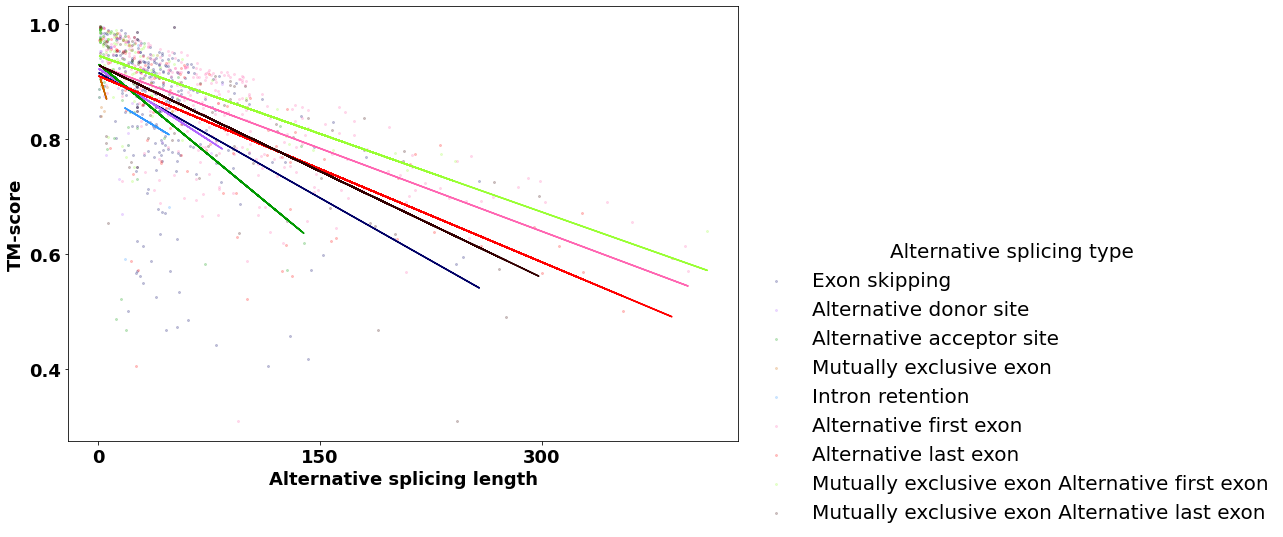

True

In [50]:
plot_length_tm(tm_score_length_high)

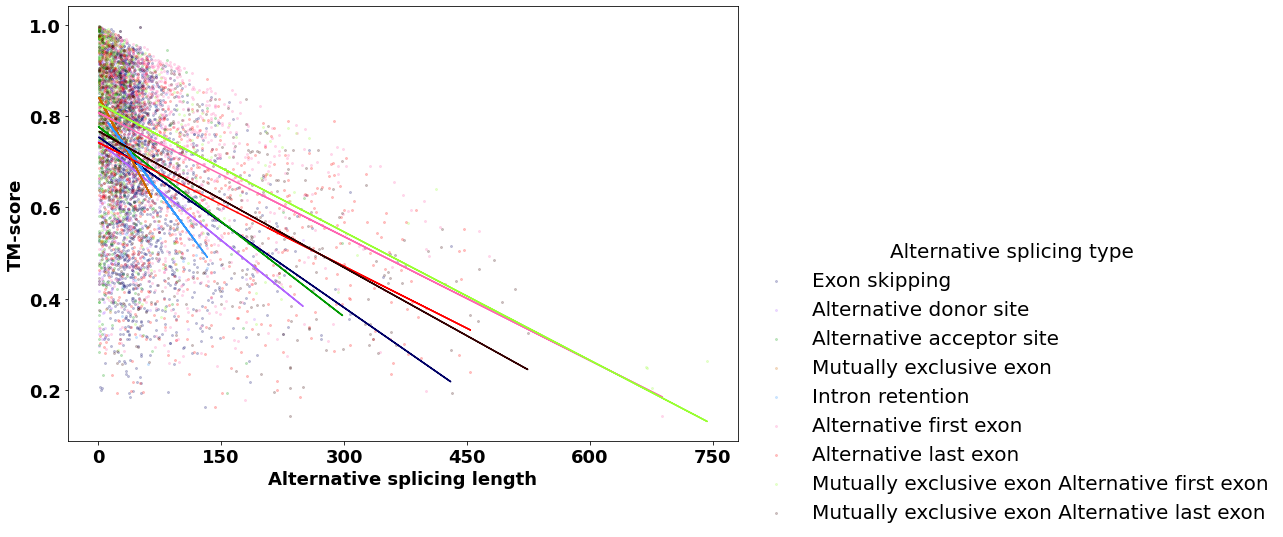

True

In [47]:
plot_length_tm(tm_score_length)

<span style="font-size: 20px;">Plot sequence identity and TM-score: </span>

In [13]:
#load data
tm_score=load_file_json(tm_score_path)
sequence_identity=load_file_json(sequence_identity_path)
as_event=load_file_json(as_event_path)
#isoform_high_confident=pd.read_csv(isoform_hgih_confident_path)
#reference_high_confident=pd.read_csv(reference_hgih_confident_path)

In [21]:
isoform_high_confident = isoform_summary[isoform_summary['plddt']>=70.0].reset_index(drop=True)
reference_high_confident = reference_summary[reference_summary['plddt']>=70.0].reset_index(drop=True)

In [11]:
#select only high and confident structures
def combine_metric_quality(metric_dic,isoform_quality_csv,reference_quality_csv):
    quality_metric_dic={}
    for entry in metric_dic.keys():
        ref=entry.split('-')[0]
        if entry in list(isoform_quality_csv['isoform']) and ref in list(reference_quality_csv['reference']):
            quality_metric_dic[entry]=metric_dic[entry]
    return quality_metric_dic

In [ ]:
high_tm=combine_metric_quality(tm_score,isoform_high,reference_high)
high_confident_tm=combine_metric_quality(tm_score,isoform_high_confident,reference_high_confident)

In [11]:
#show interesting examples
different_helix_orientation_list=['O60499-2','P27701-2','A8MT69-3','Q9UL16-2','P24001-6','Q5J8X5-2','Q8IXM6-2','Q92569-2',
                                  'Q9HD89-2','Q86UA6-2','Q969E2-2','Q9UKR8-3','Q07812-4','O00161-2']
loss_of_repeat_domain_list=['O00481-4','Q7L513-8','Q7Z4I7-5','Q9Y286-2','Q9NYZ4-2','Q02985-2']
structure_compactly_change_list=['Q99836-2','Q9BUX1-2','Q9UKT5-2','Q96MS3-2','Q9NZI8-2','O14713-2','Q9UN36-4','Q14994-15',
                                 'Q8NDX2-2','P61956-2','Q68CL5-1','Q9BQ65-2','O43766-3','P40926-2','P40926-2']

In [20]:
different_helix_orientation_list=[]
loss_of_repeat_domain_list=[]
structure_compactly_change_list=[]

In [21]:
example_dic={'different_helix_orientation':different_helix_orientation_list,
             'loss_of_repeat_domain':loss_of_repeat_domain_list,
             'structure_compactly_change':structure_compactly_change_list}

In [24]:
#plot
def plot_id_tm_class(identity_dic,tm_dic,as_event,example_dic=None,name=None):
    tm_list=[]
    identity_list=[]
    different_helix_orientation_tm_list=[]
    different_helix_orientation_identity_list=[]
    loss_of_repeat_domain_tm_list=[]
    loss_of_repeat_domain_identity_list=[]
    structure_compactly_change_tm_list=[]
    structure_compactly_change_identity_list=[]
    high_id_low_tm_dic={'isoform':[],'identity':[],'tm_align':[],'as_event':[]}
    for isoform in tm_dic.keys():  
        if identity_dic[isoform]>70 and tm_dic[isoform]<0.5 and example_dic:
            if isoform in example_dic['different_helix_orientation']:
                different_helix_orientation_tm_list.append(tm_dic[isoform])
                different_helix_orientation_identity_list.append(identity_dic[isoform])
            elif isoform in example_dic['loss_of_repeat_domain']:
                loss_of_repeat_domain_tm_list.append(tm_dic[isoform])
                loss_of_repeat_domain_identity_list.append(identity_dic[isoform])
            elif isoform in example_dic['structure_compactly_change']:
                structure_compactly_change_tm_list.append(tm_dic[isoform])
                structure_compactly_change_identity_list.append(identity_dic[isoform])
            else:
                tm_list.append(tm_dic[isoform])
                identity_list.append(identity_dic[isoform])
            high_id_low_tm_dic['isoform'].append(isoform)
            high_id_low_tm_dic['identity'].append(identity_dic[isoform])
            high_id_low_tm_dic['tm_align'].append(tm_dic[isoform])
            if isoform in as_event.keys():
                high_id_low_tm_dic['as_event'].append(1)
            else:
                high_id_low_tm_dic['as_event'].append(0)
        else:
            tm_list.append(tm_dic[isoform])
            identity_list.append(identity_dic[isoform]) 
    identity_list=pd.Series(identity_list)
    tm_list=pd.Series(tm_list)
    corr=tm_list.corr(identity_list,method='pearson')
    print(corr)
    fig = plt.figure(figsize=(12,8))
    plt.text(10, 0.8,f'PCC: {corr:.3f}', fontsize=20)
    y_locator = ticker.MultipleLocator(base=0.2)
    plt.gca().yaxis.set_major_locator(y_locator)
    plt.xlabel("Sequence identity (%)",fontsize=18,weight='bold')  
    plt.ylabel("TM-score",fontsize=18,weight='bold')
    plt.scatter(identity_list,tm_list,s=1,alpha=0.6)
    print(len(identity_list))
    #plt.scatter(different_helix_orientation_identity_list,different_helix_orientation_tm_list,s=8,c='red')
    #plt.scatter(loss_of_repeat_domain_identity_list,loss_of_repeat_domain_tm_list,s=8,c='black')
    #plt.scatter(structure_compactly_change_identity_list,structure_compactly_change_tm_list,s=8,c='orange')
    y_major_locator = MultipleLocator(0.2)
    plt.ylim(0,1.1)
    plt.xlim(0,105)
    plt.yticks(fontsize=18,weight='bold')
    plt.xticks(fontsize=18,weight='bold')
    high_id_low_tm_df=pd.DataFrame(high_id_low_tm_dic)
    plt.savefig('tm_id_'+name+'.png',dpi=600,bbox_inches='tight')
    #plt.savefig('scatter_high_confident.png',dpi=600,bbox_inches='tight')
    plt.show()
    return high_id_low_tm_df
#high_id_low_tm_df=plot_id_tm_class(sequence_identity,high_confident_tm,as_event,different_helix_orientation_list,loss_of_repeat_domain_list,structure_compactly_change_list)
#high_id_low_tm_df=plot_id_tm_class(sequence_identity,high_confident_tm,as_event,example_dic)

0.8080183955296009


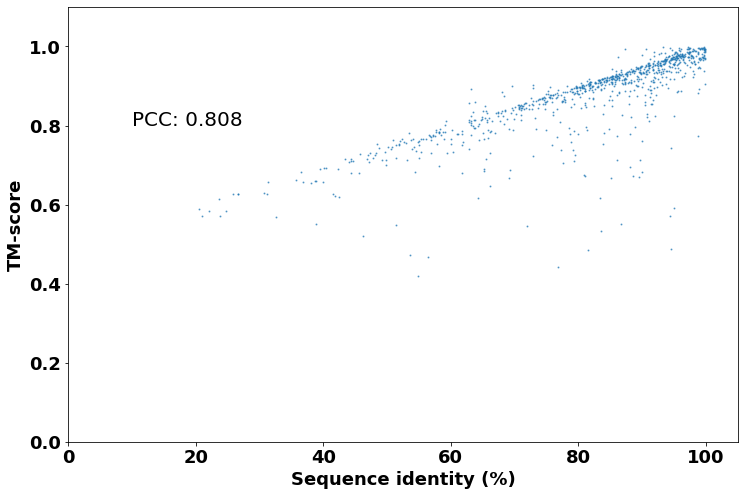

In [33]:
high_id_low_tm_df = plot_id_tm_class(sequence_identity,high_tm,as_event)

<span style="font-size: 20px;">Finding examples using non-IDR and non HE isoforms: </span>

In [6]:
non_HE_isoform_path='../data/txt/non_HE_isoform.txt'

In [7]:
non_HE_isoform_list = []
with open(non_HE_isoform_path,'r') as f:
    for line in f:
        line = line.replace('\n','')
        non_HE_isoform_list.append(line)
f.close()

In [8]:
non_HE_reference_list = []
for isoform in non_HE_isoform_list:
    non_HE_reference_list.append(isoform.split('-')[0])
non_HE_reference_list = list(set(non_HE_reference_list))

In [9]:
non_HE_isoform_summary = isoform_summary[isoform_summary['isoform'].isin(non_HE_isoform_list)]
non_HE_isoform_summary = non_HE_isoform_summary.reset_index(drop=True)

non_HE_reference_summary = reference_summary[reference_summary['reference'].isin(non_HE_reference_list)]
non_HE_reference_summary = non_HE_reference_summary.reset_index(drop=True)

In [14]:
non_HE_tm=combine_metric_quality(tm_score,non_HE_isoform_summary,non_HE_reference_summary)

In [16]:
tm_score_length_non_HE = tm_score_length[tm_score_length['isoform'].isin(non_HE_isoform_list)].reset_index(drop=True)

Exon skipping
-0.3978478565426343
Alternative donor site
-0.38118594492245633
Alternative acceptor site
-0.42339733178328887
Mutually exclusive exon
nan
Intron retention
-0.6810489978626156
Alternative first exon
-0.671696173061303
Alternative last exon
-0.6254996169628936
Mutually exclusive exon Alternative first exon
-0.5769389685757496
Mutually exclusive exon Alternative last exon
-0.5584955317050494


/sw/pkgs/arc/python3.10-anaconda/2023.03/lib/python3.10/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/sw/pkgs/arc/python3.10-anaconda/2023.03/lib/python3.10/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/sw/pkgs/arc/python3.10-anaconda/2023.03/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/sw/pkgs/arc/python3.10-anaconda/2023.03/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/sw/pkgs/arc/python3.10-anaconda/2023.03/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) *

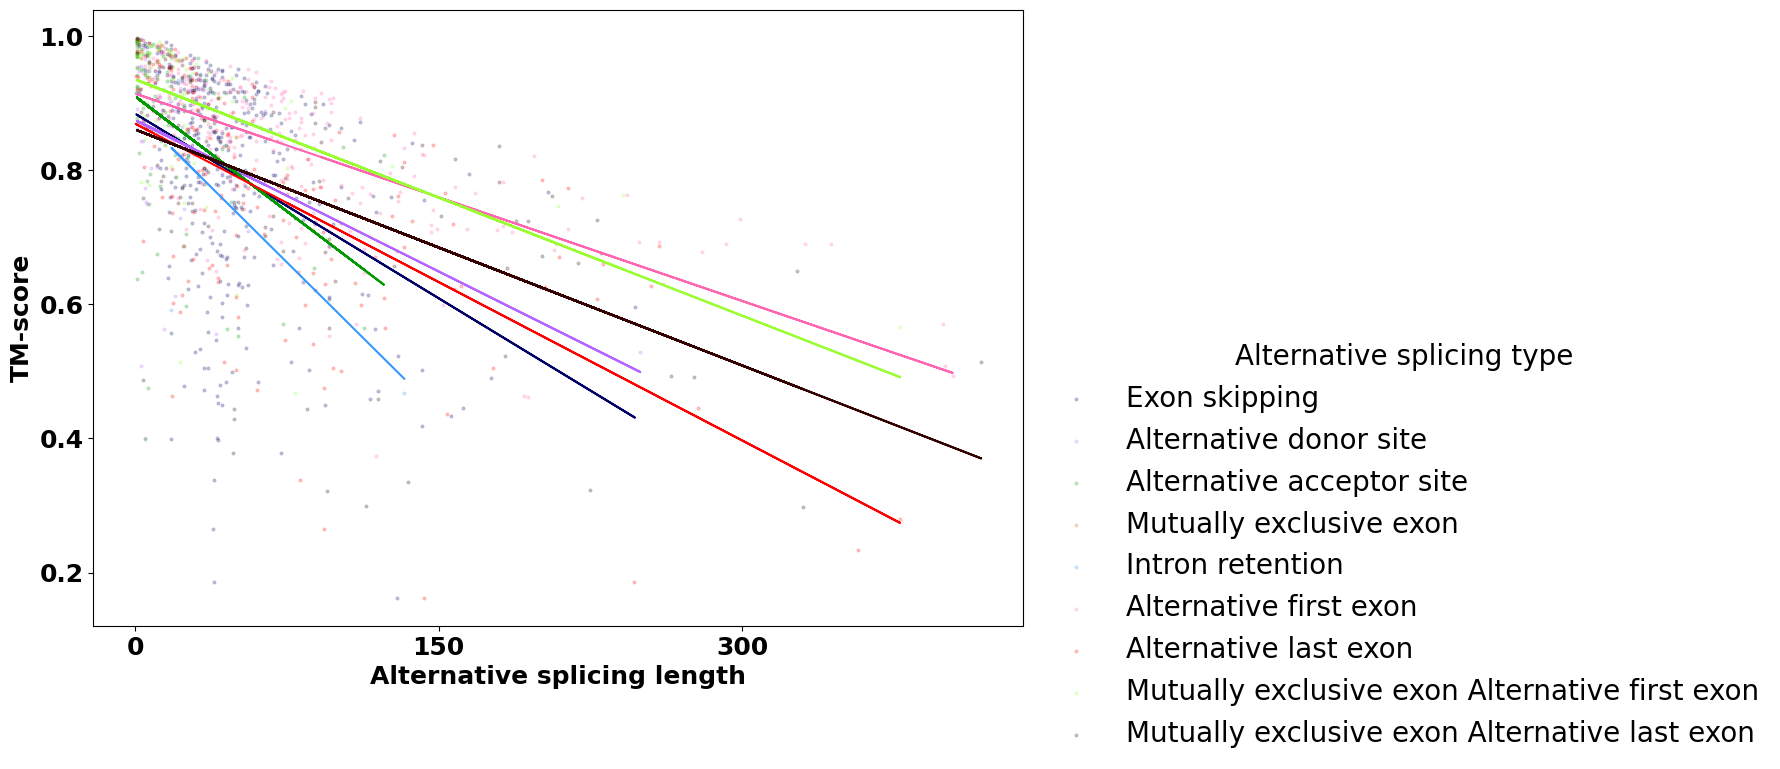

True

In [35]:
plot_length_tm(tm_score_length_non_HE,name='non_HE')

0.7980418522508185
1359


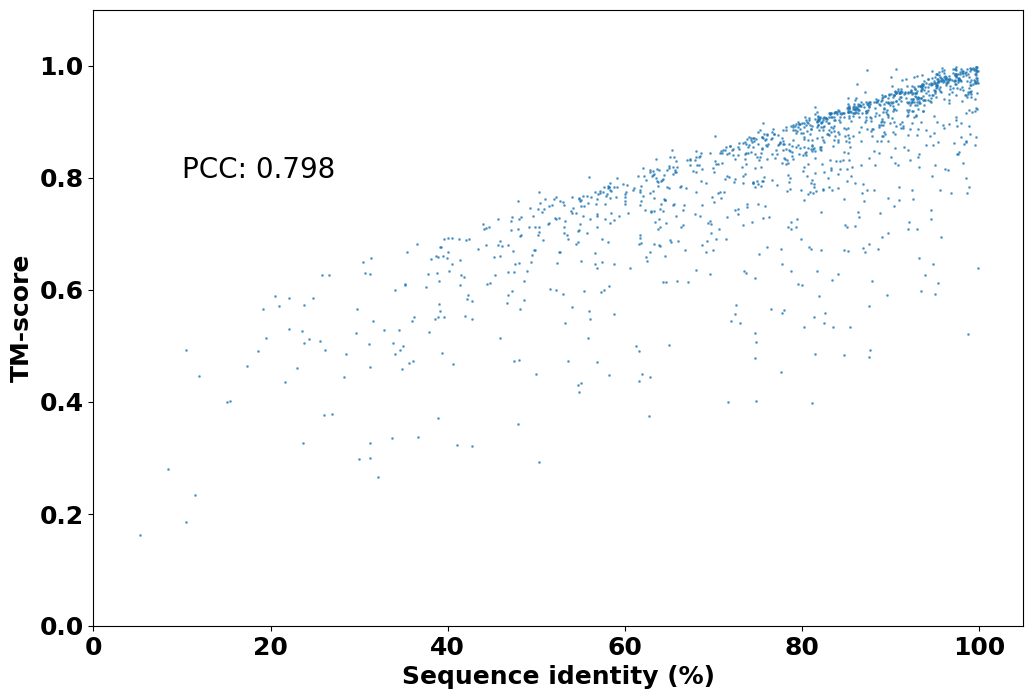

In [25]:
high_id_low_tm_df_non_HE = plot_id_tm_class(sequence_identity,non_HE_tm,as_event,example_dic,name='non_HE')

In [23]:
high_id_low_tm_df_non_HE

,isoform,identity,tm_align,as_event
0,A8MT69-3,71.604938,0.399199,1
1,P40926-2,87.573964,0.480098,1
2,P61956-2,74.736842,0.478149,1
3,P62993-2,81.105991,0.398127,1
4,Q02985-2,81.515152,0.484572,1
5,Q99836-2,84.797297,0.484278,1
6,Q9HAJ7-2,74.863388,0.400804,1
7,Q9HAJ7-3,77.595628,0.453345,1
8,Q9UPQ4-2,87.698413,0.492288,0


In [ ]:
#helix: A8MT69-3(reference has EM),Q9UPQ4-2
#loop: P40926-2(MDH2),P61956-2(reference has NMR),P62993-2(reference has X-ray),Q99836-2


In [34]:
for isoform in non_HE_tm.keys():
    if sequence_identity[isoform]>=70 and non_HE_tm[isoform]<0.5:
        print(isoform)

A8MT69-3
P40926-2
P61956-2
P62993-2
Q02985-2
Q99836-2
Q9HAJ7-2
Q9HAJ7-3
Q9UPQ4-2


In [32]:
len(non_HE_tm)

1359

In [6]:
non_HE_isoform_list[-1]

'Q9NPA8-2'

In [17]:
non_HE_isoform_tm

{'A0A1B0GTI8-2': 0.497576192,
 'A0AVF1-2': 0.876818001,
 'A0AVF1-3': 0.918221925,
 'A1A5D9-2': 0.324520446,
 'A1XBS5-3': 0.840540187,
 'A2A2Y4-2': 0.674911555,
 'A2A2Y4-3': 0.412914124,
 'A2RU49-3': 0.765674018,
 'A2VDF0-2': 0.931518789,
 'A4QPB2-2': 0.91181417,
 'A4QPH2-4': 0.582519044,
 'A5D8V7-2': 0.291493816,
 'A5PLN9-2': 0.863574142,
 'A5PLN9-4': 0.860966986,
 'A5PLN9-5': 0.923429103,
 'A5PLN9-7': 0.809896627,
 'A5X5Y0-2': 0.908745781,
 'A5X5Y0-4': 0.844694152,
 'A6NC86-4': 0.712404798,
 'A6NEC2-2': 0.773065274,
 'A6NEM1-2': 0.426491174,
 'A6NFN9-1': 0.795624347,
 'A6NFU8-2': 0.742410201,
 'A6NFY4-2': 0.418551653,
 'A6NI73-2': 0.692388952,
 'A6NJ78-2': 0.653703724,
 'A6NK59-2': 0.746812548,
 'A6NK59-3': 0.905151786,
 'A6NKQ9-2': 0.710282673,
 'A6NLP5-2': 0.740530204,
 'A6NM10-2': 0.841727342,
 'A6NNP5-5': 0.491046353,
 'A6XGL0-2': 0.873467753,
 'A7E2S9-2': 0.709165334,
 'A8MUH7-2': 0.711801324,
 'A8MV23-2': 0.958625309,
 'B7ZAQ6-2': 0.689524757,
 'B7ZAQ6-3': 0.936272562,
 'K7EJ46-